#### **Análisis académico de los estudiantes en el segundo semestre**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None

In [2]:
df = pd.read_csv('../data_raw/dataset.csv')
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,10,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,4,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,10,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,4,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,10,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,5,0,0,0,1,1,0,19,0,0,6,7,5,13.600000,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,10,1,0,1,0,0,0,18,1,0,6,6,6,12.000000,0,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,10,1,0,0,1,0,1,30,0,0,7,8,7,14.912500,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,5,1,0,0,1,0,1,20,0,0,5,5,5,13.800000,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


**Extraer características**

In [4]:
secondSemester_features = df.loc[df['Target']=='Dropout',['Curricular units 2nd sem (credited)','Curricular units 2nd sem (enrolled)',
                                                         'Curricular units 2nd sem (evaluations)','Curricular units 2nd sem (approved)',
                                                         'Curricular units 2nd sem (grade)','Curricular units 2nd sem (without evaluations)']]

In [6]:
print(f'Numero de estudiantes: {len(secondSemester_features)}')

Numero de estudiantes: 1421


In [5]:
secondSemester_features.describe()

,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations)
count,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000
mean,0.449683,5.780436,7.173821,1.940183,5.899339,0.237861
std,1.679548,2.108249,4.817374,2.573691,6.118740,0.994210
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5.000000,5.000000,0.000000,0.000000,0.000000
50%,0.000000,6.000000,7.000000,0.000000,0.000000,0.000000
75%,0.000000,6.000000,10.000000,4.000000,11.833333,0.000000
max,16.000000,18.000000,25.000000,16.000000,17.714286,12.000000


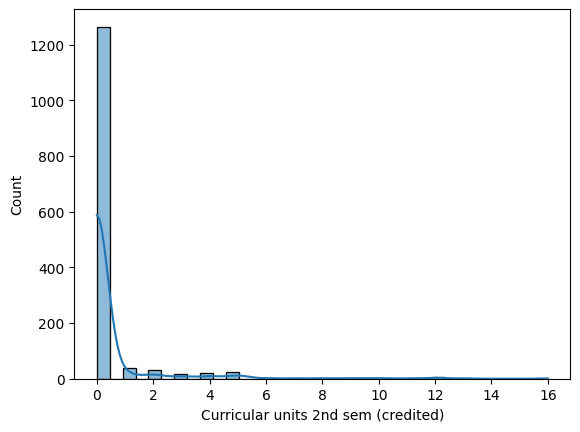

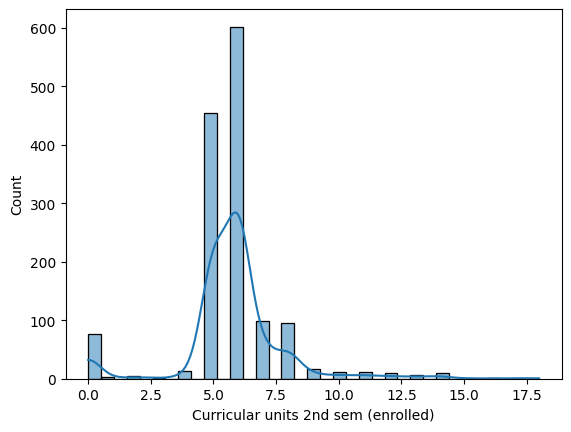

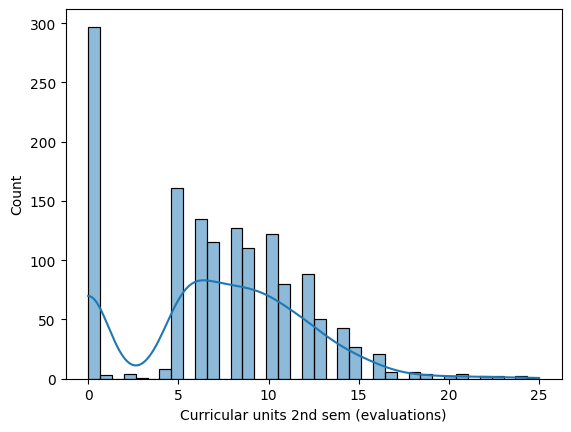

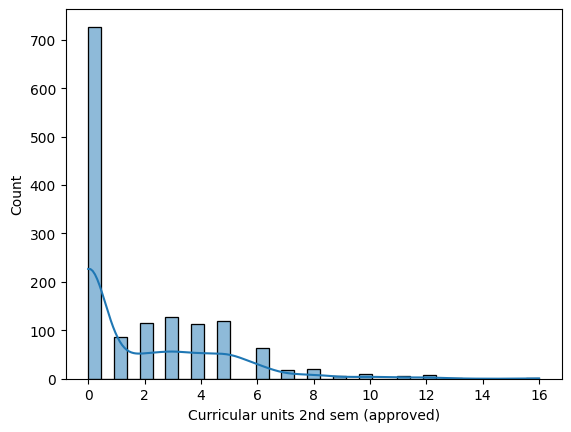

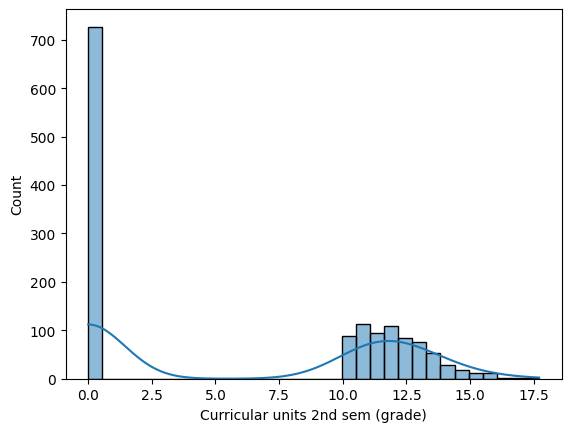

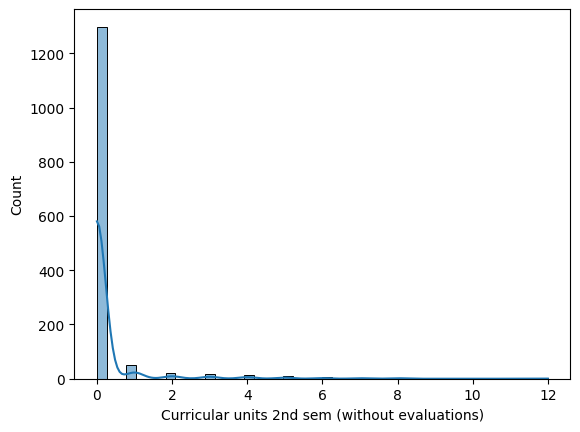

In [7]:
for i in secondSemester_features.columns:
    sns.histplot(data=secondSemester_features, x=i, kde=True, bins=len(i))
    plt.show()

Observaciones:
- La gran mayoría de estudiantes no recuperó ningún crédito al finalizar el 2º semestre de sus estudios.
- Cursaron entre 5 y 6 asignaturas/unidades (algunos más otros menos).
- La mayoría no ha sido evaluado de ninguna unidad, el resto ha sido evaluado entre 5-10 unidades.
- La mayoria no han aprobado ninguna, el resto que lograron aprobar rondan las 4 unidades.
- Las calificaciones generales son de 0.
- Casi todas las unidades ya han sido evaluadas.

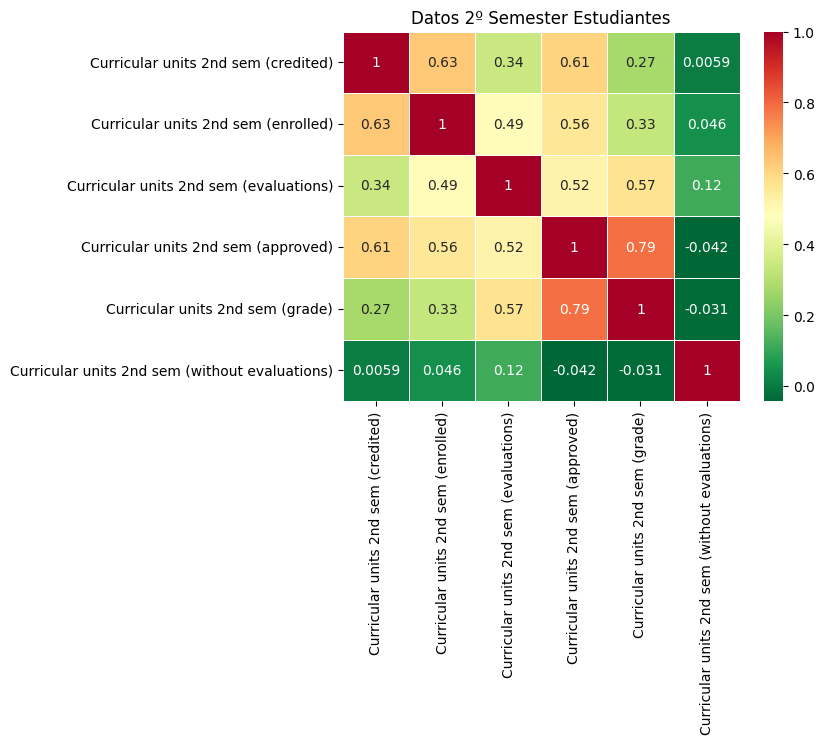

In [8]:
# Mapa de correlaciones entre caractersticas
secondSemester_corr = secondSemester_features.corr()
#mask = np.triu(np.ones_like(firstSemester_corr, dtype=bool))
sns.heatmap(data=secondSemester_corr,cmap='RdYlGn_r', annot=True, linewidths=.5)
plt.title('Datos 2º Semester Estudiantes')
plt.show()

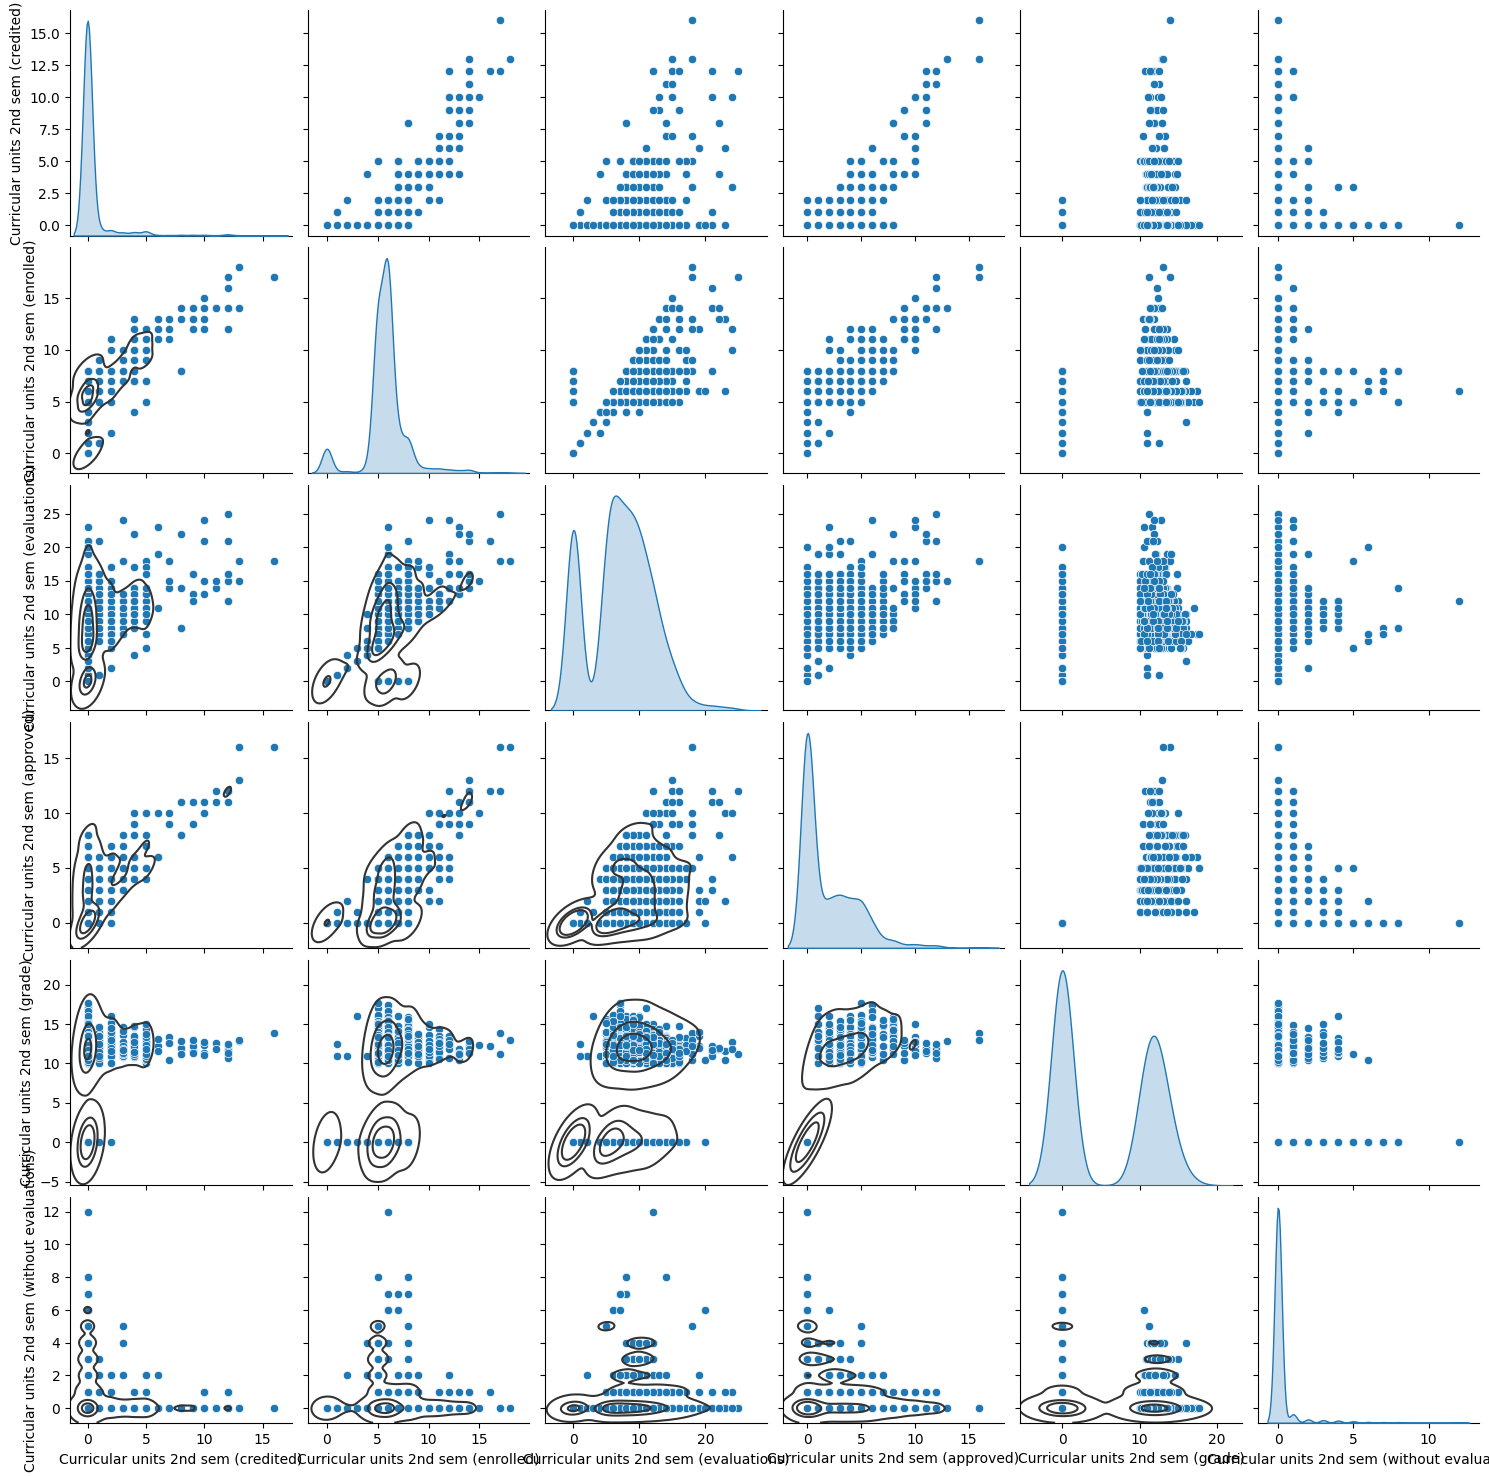

In [9]:
g=sns.pairplot(secondSemester_features, diag_kind='kde')
g.map_lower(sns.kdeplot, levels=4, color=".2")

Observaciones:
- Los estudiantes con una mayor cantidad de asignaturas inscritos, tienden a recuperar una mayor cantidad de estas.
- Conformen aprueban obtienen los creditos (algunas unidades son no creditadas).
- No difiere el numero de probadas con la calificación.